In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [5]:
# 定数
G = 6.67430e-11  # 万有引力定数 (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # 太陽の質量 (kg)
M_earth = 5.972e24  # 地球の質量 (kg)
M_mars = 6.39e23  # 火星の質量 (kg)
R_earth = 6371000  # 地球の半径 (m)
R_mars = 3389500  # 火星の半径 (m)

# 太陽からの距離
r_earth_orbit = 1.496e11  # 地球の軌道半径 (m)
r_mars_orbit = 2.279e11  # 火星の軌道半径 (m)

# ロケットのパラメータ
mass_dry = 50000  # ロケットの乾燥質量 (kg)
mass_fuel = 300000  # 燃料の質量 (kg)
initial_mass = mass_dry + mass_fuel  # 初期質量 (kg)
thrust = 1.5e7  # 推力 (N)
specific_impulse = 450  # 比推力 (s)

# ホーマン遷移軌道の計算
def hohmann_transfer_velocity(r1, r2):
    mu = G * M_sun
    v1 = np.sqrt(mu / r1)
    v2 = np.sqrt(mu / r2)
    delta_v1 = np.sqrt(mu * (2/r1 - 1/((r1 + r2)/2))) - v1
    delta_v2 = v2 - np.sqrt(mu * (2/r2 - 1/((r1 + r2)/2)))
    return delta_v1, delta_v2

delta_v1, delta_v2 = hohmann_transfer_velocity(r_earth_orbit, r_mars_orbit)

# 時間範囲
burn_time1 = 600  # 第一段階の燃焼時間 (s)
burn_time2 = 600  # 第二段階の燃焼時間 (s)
t_span = (0, burn_time1 + burn_time2)
t_eval = np.linspace(0, burn_time1 + burn_time2, 1000)


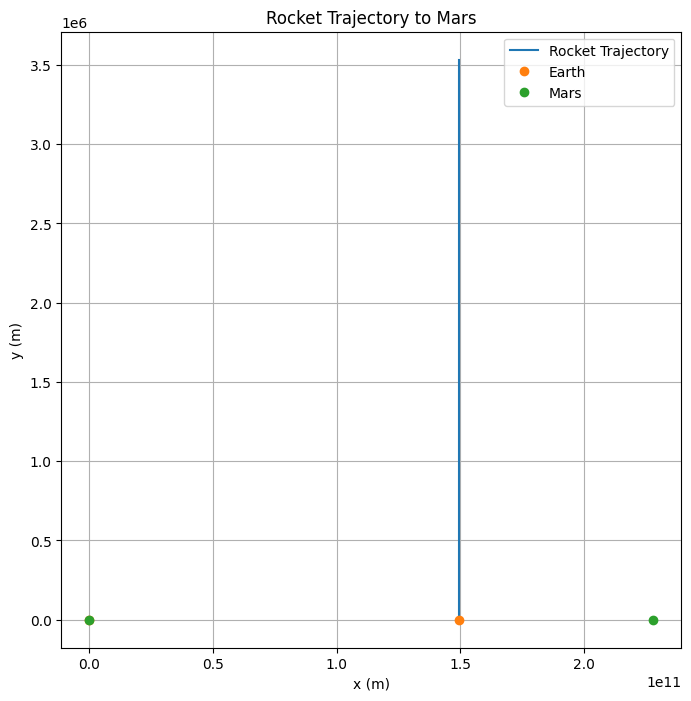

In [7]:
def rocket_dynamics(t, y):
    x, y, vx, vy, mass = y
    r = np.sqrt(x**2 + y**2)

    if mass > mass_dry:
        if t <= burn_time1:
            current_thrust = thrust
        elif burn_time1 < t <= burn_time1 + burn_time2:
            current_thrust = thrust
        else:
            current_thrust = 0
        fuel_consumption = current_thrust / (specific_impulse * G)
    else:
        current_thrust = 0
        fuel_consumption = 0

    # 推力による加速度
    ax_thrust = (current_thrust / mass) * (vx / np.sqrt(vx**2 + vy**2))
    ay_thrust = (current_thrust / mass) * (vy / np.sqrt(vx**2 + vy**2))

    # 太陽の重力による加速度
    mu_sun = G * M_sun
    ax_gravity = -mu_sun * x / r**3
    ay_gravity = -mu_sun * y / r**3

    # 合計加速度
    ax = ax_thrust + ax_gravity
    ay = ay_thrust + ay_gravity

    # 質量の変化
    d_mass = -fuel_consumption

    return [vx, vy, ax, ay, d_mass]

# 初期条件
y0 = [r_earth_orbit, 0, 0, delta_v1, initial_mass]  # [x, y, vx, vy, mass]

# 微分方程式の数値解法
solution = solve_ivp(rocket_dynamics, t_span, y0, t_eval=t_eval)

# 結果の取得
x = solution.y[0]
y = solution.y[1]
vx = solution.y[2]
vy = solution.y[3]

# プロット
plt.figure(figsize=(8, 8))
plt.plot(x, y, label='Rocket Trajectory')
plt.plot([0, r_earth_orbit], [0, 0], 'o', label='Earth')
plt.plot([0, r_mars_orbit], [0, 0], 'o', label='Mars')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Rocket Trajectory to Mars')
plt.legend()
plt.grid(True)
plt.show()


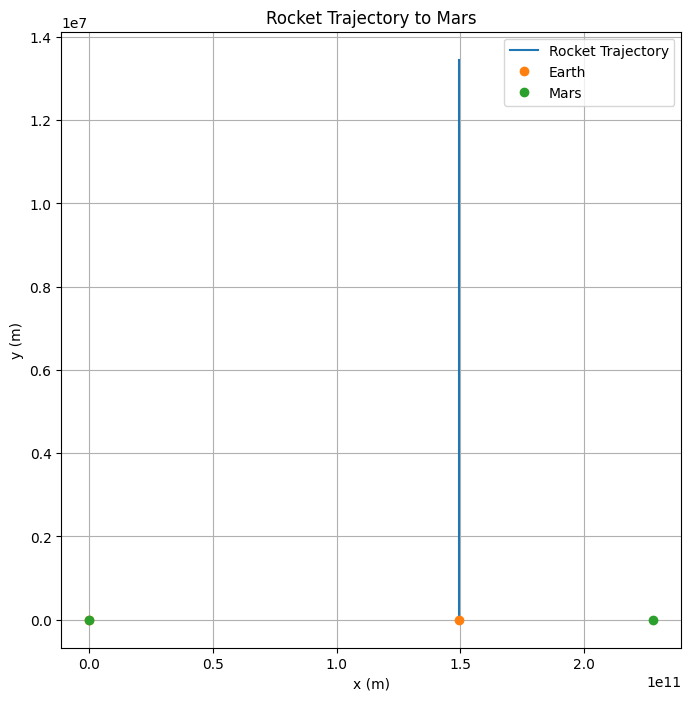

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 定数
G = 6.67430e-11  # 万有引力定数 (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # 太陽の質量 (kg)
M_earth = 5.972e24  # 地球の質量 (kg)
M_mars = 6.39e23  # 火星の質量 (kg)
R_earth = 6371000  # 地球の半径 (m)
R_mars = 3389500  # 火星の半径 (m)
g0 = 9.81  # 地表の重力加速度 (m/s^2)

# 太陽からの距離
r_earth_orbit = 1.496e11  # 地球の軌道半径 (m)
r_mars_orbit = 2.279e11  # 火星の軌道半径 (m)

# ロケットのパラメータ
mass_dry = 50000  # ロケットの乾燥質量 (kg)
mass_fuel = 300000  # 燃料の質量 (kg)
initial_mass = mass_dry + mass_fuel  # 初期質量 (kg)
thrust = 1.5e7  # 推力 (N)
specific_impulse = 450  # 比推力 (s)

# 乗員
num_crew = 2  # 乗員数
mass_crew = 70  # 一人当たりの質量 (kg)
total_crew_mass = num_crew * mass_crew

# 生命維持システム
oxygen_per_day = 0.84  # 一人当たりの酸素消費量 (kg/day)
food_per_day = 0.62  # 一人当たりの食料消費量 (kg/day)
water_per_day = 3.0  # 一人当たりの水消費量 (kg/day)
days_to_mars = 180  # 火星までの推定日数

total_oxygen = oxygen_per_day * num_crew * days_to_mars
total_food = food_per_day * num_crew * days_to_mars
total_water = water_per_day * num_crew * days_to_mars

life_support_mass = total_oxygen + total_food + total_water


# ホーマン遷移軌道の計算
def hohmann_transfer_velocity(r1, r2):
    mu = G * M_sun
    v1 = np.sqrt(mu / r1)
    v2 = np.sqrt(mu / r2)
    delta_v1 = np.sqrt(mu * (2 / r1 - 1 / ((r1 + r2) / 2))) - v1
    delta_v2 = v2 - np.sqrt(mu * (2 / r2 - 1 / ((r1 + r2) / 2)))
    return delta_v1, delta_v2


delta_v1, delta_v2 = hohmann_transfer_velocity(r_earth_orbit, r_mars_orbit)

# 時間範囲
burn_time1 = 600  # 第一段階の燃焼時間 (s)
burn_time2 = 600  # 第二段階の燃焼時間 (s)
t_span = (0, burn_time1 + burn_time2)
t_eval = np.linspace(0, burn_time1 + burn_time2, 1000)


def rocket_dynamics(t, y):
    x, y, vx, vy, mass = y
    r = np.sqrt(x**2 + y**2)

    if mass > mass_dry + total_crew_mass + life_support_mass:
        if t <= burn_time1:
            current_thrust = thrust
        elif burn_time1 < t <= burn_time1 + burn_time2:
            current_thrust = thrust
        else:
            current_thrust = 0
        fuel_consumption = current_thrust / (specific_impulse * g0)
    else:
        current_thrust = 0
        fuel_consumption = 0

    # 推力による加速度
    ax_thrust = (current_thrust / mass) * (vx / np.sqrt(vx**2 + vy**2))
    ay_thrust = (current_thrust / mass) * (vy / np.sqrt(vx**2 + vy**2))

    # 太陽の重力による加速度
    mu_sun = G * M_sun
    ax_gravity = -mu_sun * x / r**3
    ay_gravity = -mu_sun * y / r**3

    # 合計加速度
    ax = ax_thrust + ax_gravity
    ay = ay_thrust + ay_gravity

    # 質量の変化
    d_mass = -fuel_consumption

    return [vx, vy, ax, ay, d_mass]


# 初期条件
y0 = [r_earth_orbit, 0, 0, delta_v1, initial_mass]  # [x, y, vx, vy, mass]

# 微分方程式の数値解法
solution = solve_ivp(rocket_dynamics, t_span, y0, t_eval=t_eval)

# 結果の取得
x = solution.y[0]
y = solution.y[1]
vx = solution.y[2]
vy = solution.y[3]

# プロット
plt.figure(figsize=(8, 8))
plt.plot(x, y, label="Rocket Trajectory")
plt.plot([0, r_earth_orbit], [0, 0], "o", label="Earth")
plt.plot([0, r_mars_orbit], [0, 0], "o", label="Mars")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Rocket Trajectory to Mars")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

def equations(t, y):
    # y = [x, y, vx, vy]
    r = np.sqrt(y[0]**2 + y[1]**2)
    ax = -G * M_sun * y[0] / r**3
    ay = -G * M_sun * y[1] / r**3
    return [y[2], y[3], ax, ay]

# 初期条件
y0 = [x0, y0, vx0, vy0]  # 初期位置と速度
t_span = [0, T]  # シミュレーション時間

# 数値積分
sol = solve_ivp(equations, t_span, y0, method='RK45')